In [11]:
import pandas as pd
import json

In [31]:
# df = pd.read_csv('~/jobtmp/BirdSongDenoising/valid.csv')
# df = pd.read_csv('~/jobtmp/BirdSongDenoising/train.csv')
df = pd.read_csv('/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/voice_of_birds/train.csv')
df

,ids,response
0,124861,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
1,173699,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
2,332799,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
3,202402,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
4,257240,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
...,...,...
2156,395757,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
2157,147480,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
2158,360695,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."
2159,266341,"{""numRecordings"": ""1"", ""numSpecies"": ""1"", ""pag..."


In [32]:
df['response'].isnull().sum()

np.int64(0)

In [33]:
df[df['ids'] == df['ids'][0]]['response'].values[0]

'{"numRecordings": "1", "numSpecies": "1", "page": 1, "numPages": 1, "recordings": [{"id": "124861", "gen": "Nothocercus", "sp": "bonapartei", "ssp": "plumbeiceps", "group": "birds", "en": "Highland Tinamou", "rec": "Leonardo Ord\\u00f3\\u00f1ez-Delgado", "cnt": "Ecuador", "loc": "Sector Colibr\\u00ed, Cordillera del C\\u00f3ndor (Zamora Chinchipe)", "lat": "-3.7614", "lng": "-78.5053", "alt": "1400", "type": "song", "sex": "", "stage": "", "method": "field recording", "url": "//xeno-canto.org/124861", "file": "https://xeno-canto.org/124861/download", "file-name": "XC124861-4. Nothocercus bonapartei XC.mp3", "sono": {"small": "//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ffts/XC124861-small.png", "med": "//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ffts/XC124861-med.png", "large": "//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ffts/XC124861-large.png", "full": "//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ffts/XC124861-full.png"}, "osci": {"small": "//xeno-canto.org/sounds/uploaded/RJNSQXBI

In [34]:
df['response'] = df['response'].apply(lambda x: json.loads(x))
print(df['response'].isnull().sum())
df.head()

0


,ids,response
0,124861,"{'numRecordings': '1', 'numSpecies': '1', 'pag..."
1,173699,"{'numRecordings': '1', 'numSpecies': '1', 'pag..."
2,332799,"{'numRecordings': '1', 'numSpecies': '1', 'pag..."
3,202402,"{'numRecordings': '1', 'numSpecies': '1', 'pag..."
4,257240,"{'numRecordings': '1', 'numSpecies': '1', 'pag..."


In [44]:
from pandas import json_normalize
# Rename the 'ids' column to 'query_ids'
df_renamed = df.rename(columns={'ids': 'query_ids'})
# Normalize the 'response' column
df_normalized = json_normalize(df_renamed['response'])

# Concatenate the normalized columns with the original dataframe
df_final = pd.concat([
    df_renamed.drop(columns=['response']),
    df_normalized
    ],
    axis=1
    )

df_final.head()

,query_ids,numRecordings,numSpecies,page,numPages,recordings
0,124861,1,1,1,1,"[{'id': '124861', 'gen': 'Nothocercus', 'sp': ..."
1,173699,1,1,1,1,"[{'id': '173699', 'gen': 'Ortalis', 'sp': 'squ..."
2,332799,1,1,1,1,"[{'id': '332799', 'gen': 'Crypturellus', 'sp':..."
3,202402,1,1,1,1,"[{'id': '202402', 'gen': 'Eulipoa', 'sp': 'wal..."
4,257240,1,1,1,1,"[{'id': '257240', 'gen': 'Tinamus', 'sp': 'maj..."


In [45]:
cleaned_df = df_final[df_final['recordings'].apply(lambda x: len(x)) > 0].copy().reset_index(drop=True)

In [46]:
print(len(df_final), len(cleaned_df), len(df_final) - len(cleaned_df))
print(df_final.shape, cleaned_df.shape)

2161 2157 4
(2161, 6) (2157, 6)


In [47]:
cleaned_df.isnull().sum()

query_ids        0
numRecordings    0
numSpecies       0
page             0
numPages         0
recordings       0
dtype: int64

In [48]:
# Normalize the 'recordings' column
df_normalized_recordings = json_normalize(cleaned_df['recordings'].apply(lambda x: x[0]))
print('normalized len:', len(df_normalized_recordings))

df_normalized_recordings

normalized len: 2157


,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,dvc,mic,smp,sono.small,sono.med,sono.large,sono.full,osci.small,osci.med,osci.large
0,124861,Nothocercus,bonapartei,plumbeiceps,birds,Highland Tinamou,Leonardo Ordóñez-Delgado,Ecuador,"Sector Colibrí, Cordillera del Cóndor (Zamora ...",-3.7614,...,,,44100,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/wa...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/wa...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/wa...
1,173699,Ortalis,squamata,,birds,Scaled Chachalaca,Douglas Meyer,Brazil,"Vidal Ramos, Santa Catarina",-27.3546,...,,,32000,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/wa...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/wa...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/wa...
2,332799,Crypturellus,cinnamomeus,goldmani,birds,Thicket Tinamou,Ross Gallardy,Mexico,Sendero de Xocen,20.5984,...,,,44100,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/wa...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/wa...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/wa...
3,202402,Eulipoa,wallacei,,birds,Moluccan Megapode,Frank Lambert,Indonesia,,,...,,,44100,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/wa...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/wa...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/wa...
4,257240,Tinamus,major,peruvianus,birds,Great Tinamou,John V. Moore,Ecuador,"Pastaza: Kapawi area, left bank Río Pastaza",-2.54,...,,,44100,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/wa...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/wa...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/wa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,395757,Tinamus,guttatus,,birds,White-throated Tinamou,GABRIEL LEITE,Brazil,Reserva Biologica do Gurupi,-3.8141,...,,,48000,//xeno-canto.org/sounds/uploaded/TGBFXDVERJ/ff...,//xeno-canto.org/sounds/uploaded/TGBFXDVERJ/ff...,//xeno-canto.org/sounds/uploaded/TGBFXDVERJ/ff...,//xeno-canto.org/sounds/uploaded/TGBFXDVERJ/ff...,//xeno-canto.org/sounds/uploaded/TGBFXDVERJ/wa...,//xeno-canto.org/sounds/uploaded/TGBFXDVERJ/wa...,//xeno-canto.org/sounds/uploaded/TGBFXDVERJ/wa...
2153,147480,Ortalis,vetula,,birds,Plain Chachalaca,Paul Marvin,United States,"Santa Ana National Wildlife Refuge, Texas",26.0737,...,,,48000,//xeno-canto.org/sounds/uploaded/RFTXRYBVBX/ff...,//xeno-canto.org/sounds/uploaded/RFTXRYBVBX/ff...,//xeno-canto.org/sounds/uploaded/RFTXRYBVBX/ff...,//xeno-canto.org/sounds/uploaded/RFTXRYBVBX/ff...,//xeno-canto.org/sounds/uploaded/RFTXRYBVBX/wa...,//xeno-canto.org/sounds/uploaded/RFTXRYBVBX/wa...,//xeno-canto.org/sounds/uploaded/RFTXRYBVBX/wa...
2154,360695,Ortalis,vetula,,birds,Plain Chachalaca,Oscar Humberto Marin-Gomez,Mexico,"Xalapa Enríquez, Xalapa, Veracruz",19.5209,...,,,48000,//xeno-canto.org/sounds/uploaded/CSUHASNRSU/ff...,//xeno-canto.org/sounds/uploaded/CSUHASNRSU/ff...,//xeno-canto.org/sounds/uploaded/CSUHASNRSU/ff...,//xeno-canto.org/sounds/uploaded/CSUHASNRSU/ff...,//xeno-canto.org/sounds/uploaded/CSUHASNRSU/wa...,//xeno-canto.org/sounds/upl

In [49]:
print('intersection', set(cleaned_df.columns) & set(df_normalized_recordings.columns))
cleaned_df

intersection set()


,query_ids,numRecordings,numSpecies,page,numPages,recordings
0,124861,1,1,1,1,"[{'id': '124861', 'gen': 'Nothocercus', 'sp': ..."
1,173699,1,1,1,1,"[{'id': '173699', 'gen': 'Ortalis', 'sp': 'squ..."
2,332799,1,1,1,1,"[{'id': '332799', 'gen': 'Crypturellus', 'sp':..."
3,202402,1,1,1,1,"[{'id': '202402', 'gen': 'Eulipoa', 'sp': 'wal..."
4,257240,1,1,1,1,"[{'id': '257240', 'gen': 'Tinamus', 'sp': 'maj..."
...,...,...,...,...,...,...
2152,395757,1,1,1,1,"[{'id': '395757', 'gen': 'Tinamus', 'sp': 'gut..."
2153,147480,1,1,1,1,"[{'id': '147480', 'gen': 'Ortalis', 'sp': 'vet..."
2154,360695,1,1,1,1,"[{'id': '360695', 'gen': 'Ortalis', 'sp': 'vet..."
2155,266341,1,1,1,1,"[{'id': '266341', 'gen': 'Rhynchotus', 'sp': '..."


In [50]:
# Concatenate the normalized columns with the original dataframe
cleaned_df = pd.concat([
    cleaned_df.drop(columns=['recordings']),
    df_normalized_recordings.reset_index(drop=True)
    ],
    axis=1
)

cleaned_df.head()

,query_ids,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,group,...,dvc,mic,smp,sono.small,sono.med,sono.large,sono.full,osci.small,osci.med,osci.large
0,124861,1,1,1,1,124861,Nothocercus,bonapartei,plumbeiceps,birds,...,,,44100,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ff...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/wa...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/wa...,//xeno-canto.org/sounds/uploaded/RJNSQXBIJE/wa...
1,173699,1,1,1,1,173699,Ortalis,squamata,,birds,...,,,32000,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/ff...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/wa...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/wa...,//xeno-canto.org/sounds/uploaded/MNENFHYTAE/wa...
2,332799,1,1,1,1,332799,Crypturellus,cinnamomeus,goldmani,birds,...,,,44100,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/ff...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/wa...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/wa...,//xeno-canto.org/sounds/uploaded/FNIOJOZADD/wa...
3,202402,1,1,1,1,202402,Eulipoa,wallacei,,birds,...,,,44100,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/ff...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/wa...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/wa...,//xeno-canto.org/sounds/uploaded/YTUXOCTUEM/wa...
4,257240,1,1,1,1,257240,Tinamus,major,peruvianus,birds,...,,,44100,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/ff...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/wa...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/wa...,//xeno-canto.org/sounds/uploaded/YKKDTZHLUU/wa...


In [51]:
cleaned_df.describe()

,query_ids,page,numPages
count,2157.000000,2157.0,2157.0
mean,334223.087622,1.0,1.0
std,218030.847701,0.0,0.0
min,188.000000,1.0,1.0
25%,140886.000000,1.0,1.0
50%,303410.000000,1.0,1.0
75%,512797.000000,1.0,1.0
max,767423.000000,1.0,1.0


In [52]:
print(len(df_final), len(cleaned_df), len(df_final) - len(cleaned_df))
print(df_final.shape, cleaned_df.shape)

2161 2157 4
(2161, 6) (2157, 48)


In [53]:
cleaned_df.isna().sum()

query_ids         0
numRecordings     0
numSpecies        0
page              0
numPages          0
id                0
gen               0
sp                0
ssp               0
group             0
en                0
rec               0
cnt               0
loc               0
lat              91
lng              91
alt               0
type              0
sex               0
stage             0
method            0
url               0
file              0
file-name         0
lic               0
q                 0
length            0
time              0
date              0
uploaded          0
also              0
rmk               0
bird-seen         0
animal-seen       0
playback-used     0
temp              0
regnr             0
auto              0
dvc               0
mic               0
smp               0
sono.small        0
sono.med          0
sono.large        0
sono.full         0
osci.small        0
osci.med          0
osci.large        0
dtype: int64

In [54]:
cleaned_df.to_csv('~/jobtmp/voice_of_birds/metadata_full.csv', index=False)

cleaned_df.to_csv(
    '/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/voice_of_birds/metadata_full.csv',
    index=False
    )


# cleaned_df.to_csv('~/jobtmp/BirdSongDenoising/train_cleaned.csv', index=False)

# cleaned_df.to_csv(
#     '/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/birdsong_denoising/train_cleaned.csv',
#     index=False
#     )


# cleaned_df.to_csv('~/jobtmp/BirdSongDenoising/valid_cleaned.csv', index=False)
# cleaned_df.to_csv(
#     '/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/birdsong_denoising/valid_cleaned.csv',
#     index=False
#     )

## ChatGPT EDA:

## Voice of Birds

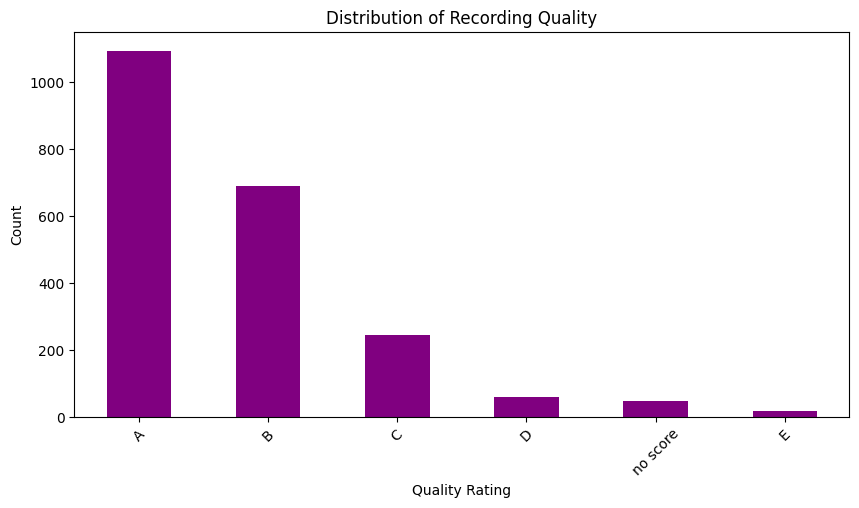

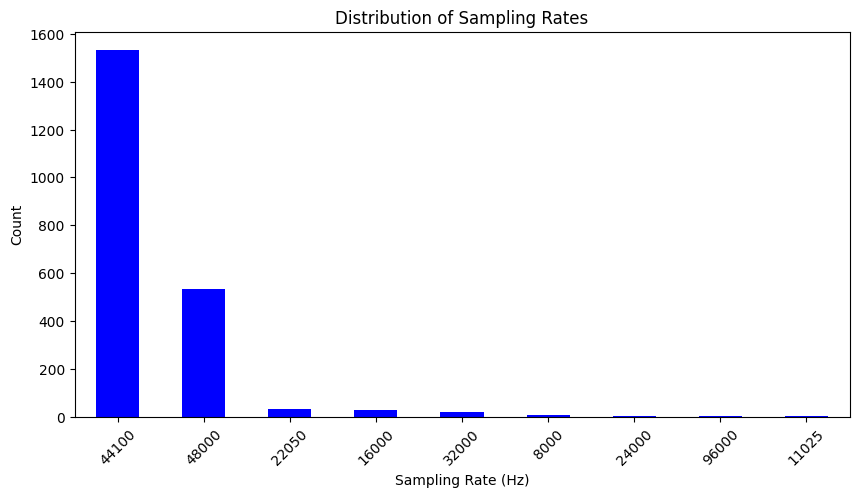

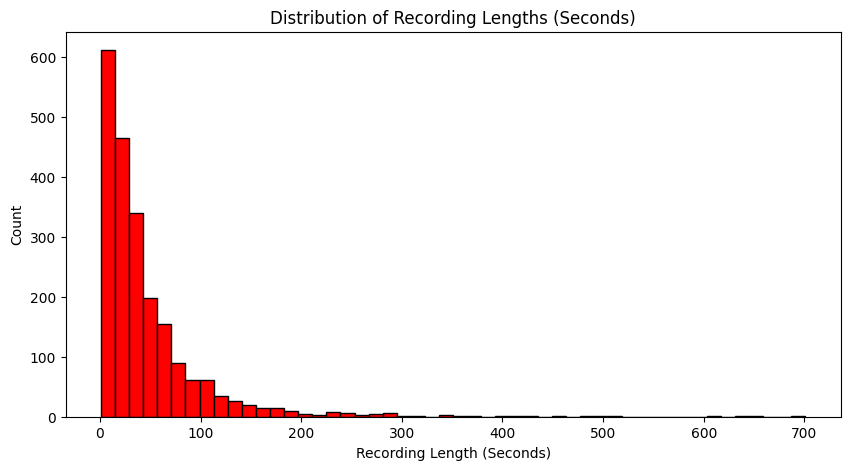

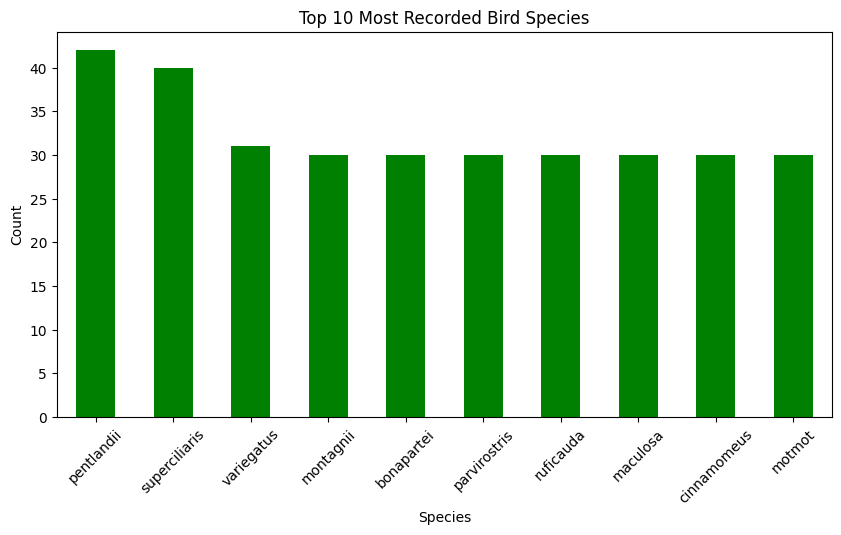

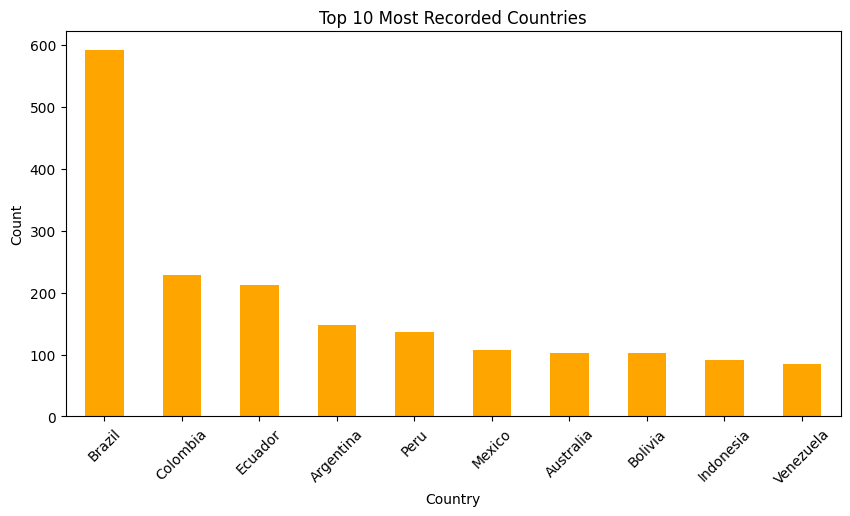

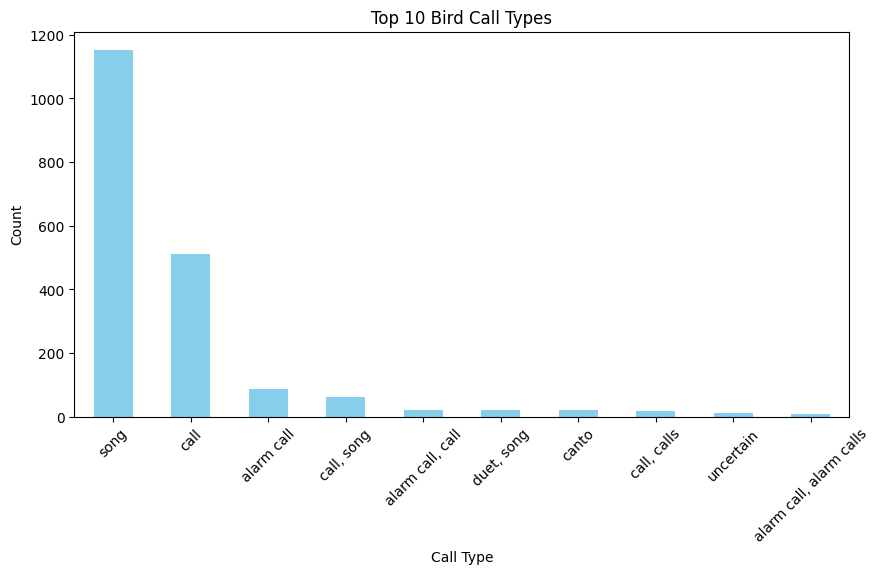

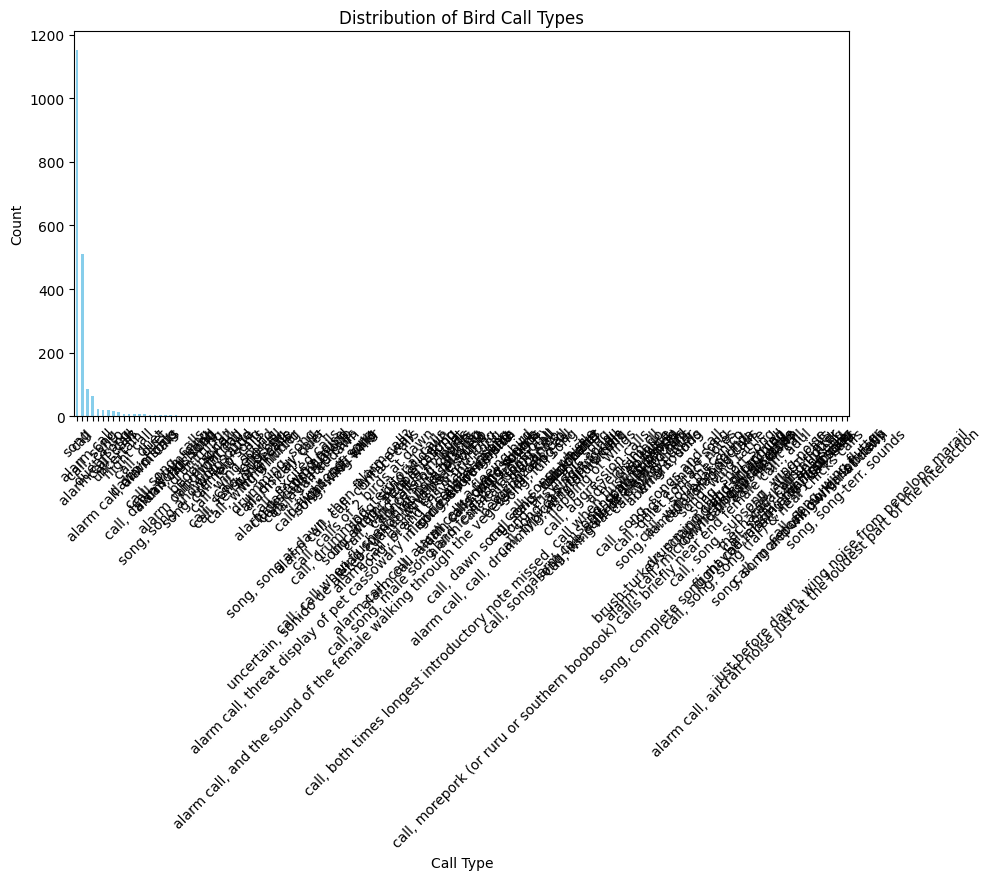

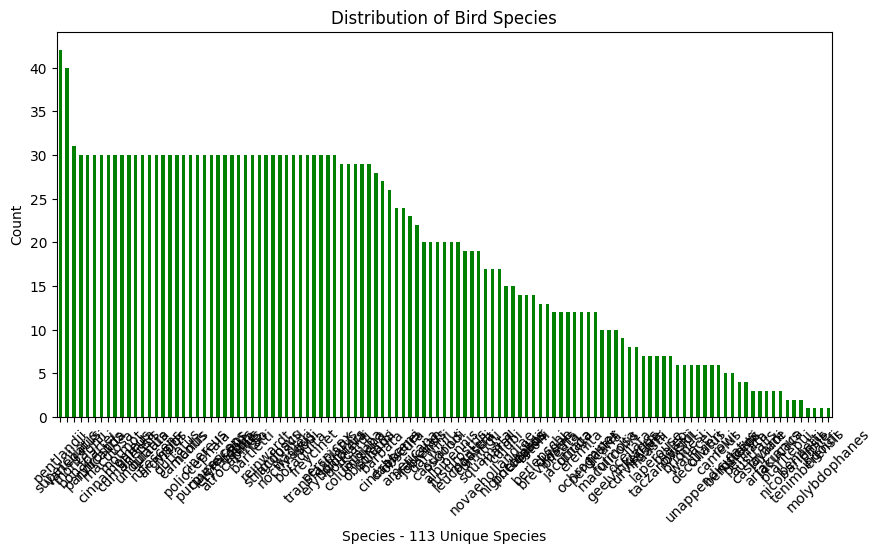

Dataset Summary: {'Total Records': 2157, 'Unique Bird Species': 113, 'Unique Locations': 1333, 'Unique Countries': 38, 'Most Common Call Type': 'song', 'Most Recorded Species': 'pentlandii', 'Most Recorded Country': 'Brazil'}
Recording Length Statistics: count    2157.000000
mean       46.800185
std        62.085542
min         1.000000
25%        13.000000
50%        29.000000
75%        57.000000
max       701.000000
Name: length_seconds, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/voice_of_birds/cleaned_api_response.csv"
df = pd.read_csv(file_path, dtype=str)

# Convert length from MM:SS format to seconds
def convert_time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        try:
            minutes, seconds = map(int, time_str.split(':'))
            return minutes * 60 + seconds
        except ValueError:
            return np.nan
    return np.nan

df['length'] = df['length'].astype(str)
df['length_seconds'] = df['length'].apply(convert_time_to_seconds)

# General Dataset Summary
dataset_summary = {
    "Total Records": len(df),
    "Unique Bird Species": df['sp'].nunique(),
    "Unique Locations": df['loc'].nunique(),
    "Unique Countries": df['cnt'].nunique(),
    "Most Common Call Type": df['type'].mode()[0],
    "Most Recorded Species": df['sp'].mode()[0],
    "Most Recorded Country": df['cnt'].mode()[0],
}

# Recording Length Statistics
recording_length_stats = df['length_seconds'].describe()

# Plot 1: Recording Quality Distribution
plt.figure(figsize=(10, 5))
df['q'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribution of Recording Quality")
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Sampling Rate Distribution
plt.figure(figsize=(10, 5))
df['smp'].value_counts().plot(kind='bar', color='blue')
plt.title("Distribution of Sampling Rates")
plt.xlabel("Sampling Rate (Hz)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Recording Length Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['length_seconds'].dropna(), bins=50, color='red', edgecolor='black')
plt.title("Distribution of Recording Lengths (Seconds)")
plt.xlabel("Recording Length (Seconds)")
plt.ylabel("Count")
plt.show()

# Plot 4: Top 10 Most Recorded Bird Species
plt.figure(figsize=(10, 5))
df['sp'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Recorded Bird Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 5: Top 10 Most Recorded Countries
plt.figure(figsize=(10, 5))
df['cnt'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Recorded Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 5.5: Top 10 Bird Call Type Distribution
plt.figure(figsize=(10, 5))
df['type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Bird Call Types")
plt.xlabel("Call Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 6: Bird Call Type Distribution
plt.figure(figsize=(10, 5))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Bird Call Types")
plt.xlabel("Call Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 7: Bird Species Distribution
plt.figure(figsize=(10, 5))
df['sp'].value_counts().plot(kind='bar', color='green')
plt.title("Distribution of Bird Species")
plt.xlabel(f"Species - {dataset_summary['Unique Bird Species']} Unique Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Display results
print("Dataset Summary:", dataset_summary)
print("Recording Length Statistics:", recording_length_stats)


## Train set:


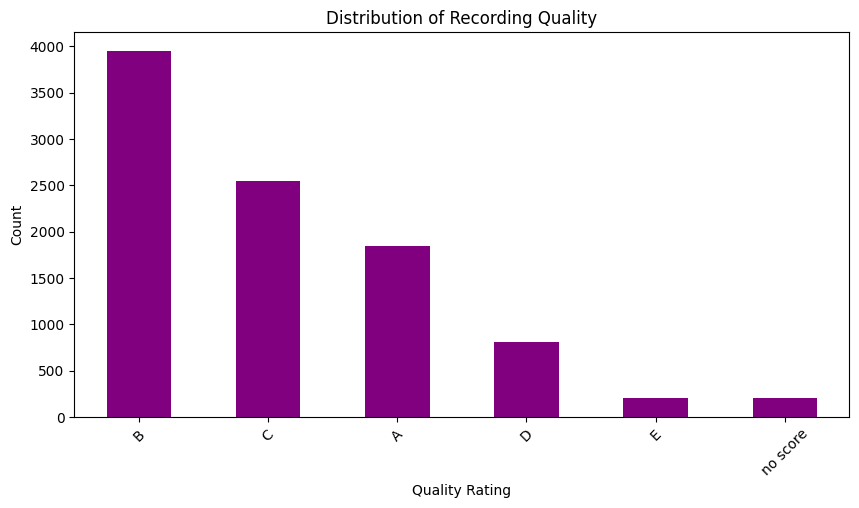

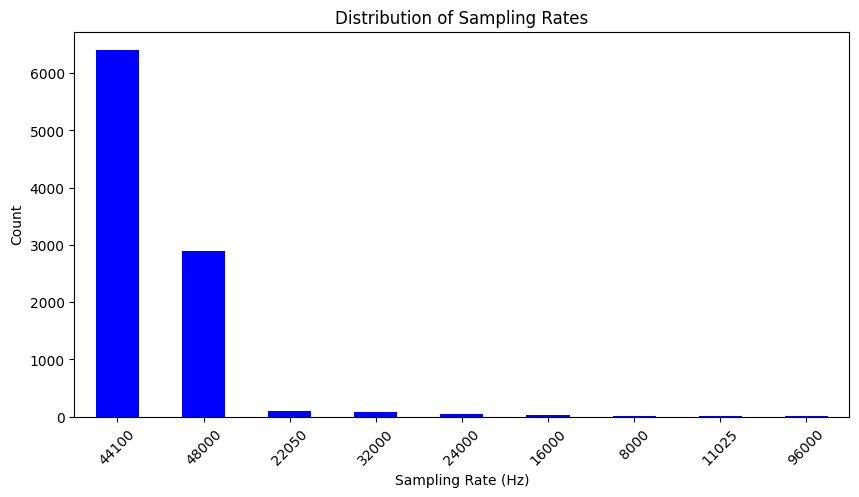

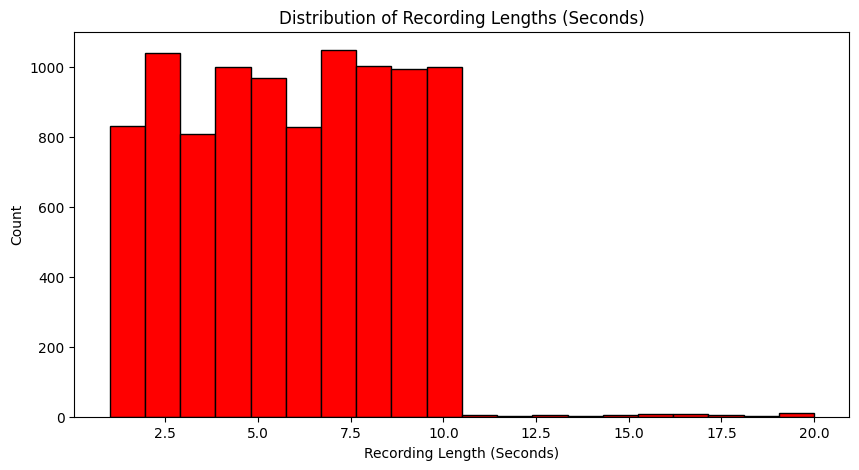

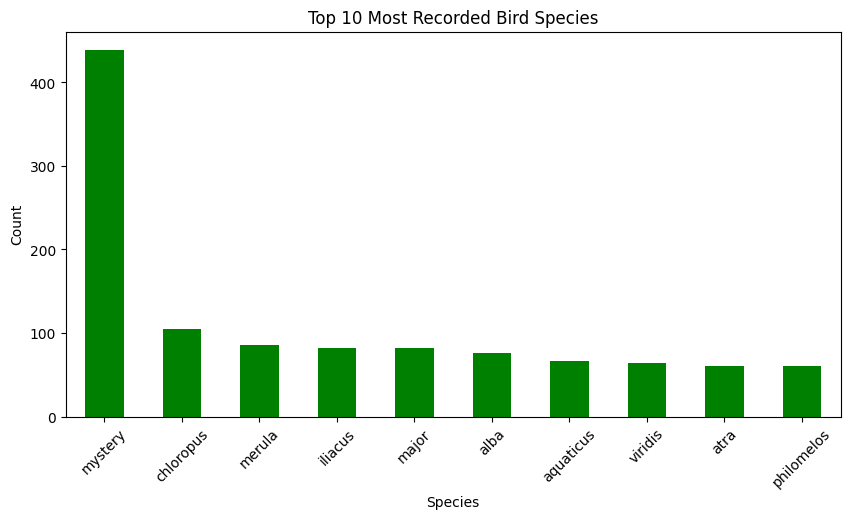

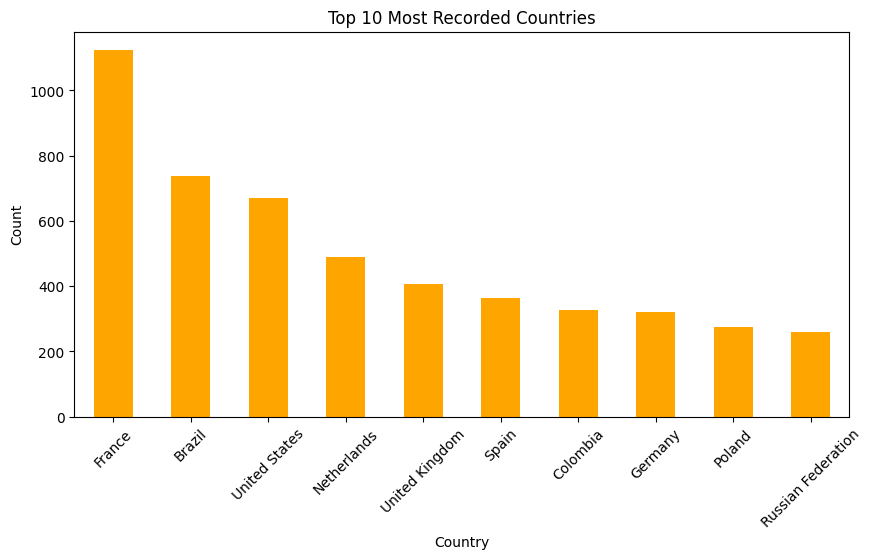

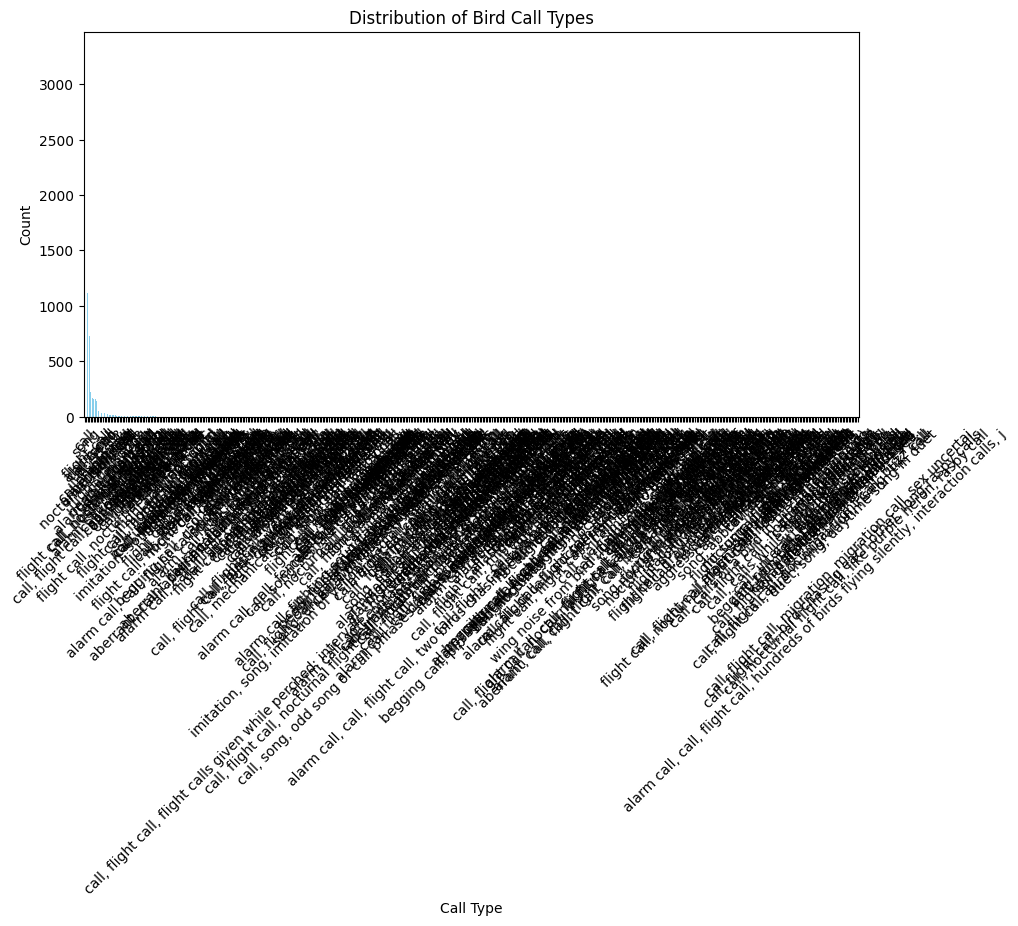

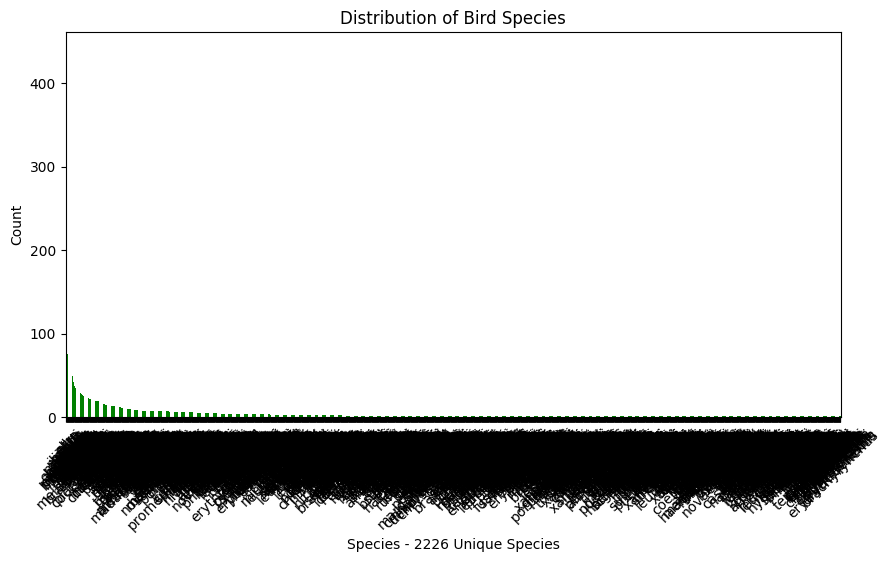

Dataset Summary: {'Total Records': 9577, 'Unique Bird Species': 2226, 'Unique Locations': 5705, 'Unique Countries': 139, 'Most Common Call Type': 'call', 'Most Recorded Species': 'mystery', 'Most Recorded Country': 'France'}
Recording Length Statistics: count    9577.000000
mean        5.675264
std         2.975991
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        20.000000
Name: length_seconds, dtype: float64


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/birdsong_denoising/train_cleaned.csv"
df = pd.read_csv(file_path, dtype=str)

# Convert length from MM:SS format to seconds
def convert_time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        try:
            minutes, seconds = map(int, time_str.split(':'))
            return minutes * 60 + seconds
        except ValueError:
            return np.nan
    return np.nan

df['length'] = df['length'].astype(str)
df['length_seconds'] = df['length'].apply(convert_time_to_seconds)

# General Dataset Summary
dataset_summary = {
    "Total Records": len(df),
    "Unique Bird Species": df['sp'].nunique(),
    "Unique Locations": df['loc'].nunique(),
    "Unique Countries": df['cnt'].nunique(),
    "Most Common Call Type": df['type'].mode()[0],
    "Most Recorded Species": df['sp'].mode()[0],
    "Most Recorded Country": df['cnt'].mode()[0],
}

# Recording Length Statistics
recording_length_stats = df['length_seconds'].describe()

# Plot 1: Recording Quality Distribution
plt.figure(figsize=(10, 5))
df['q'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribution of Recording Quality")
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Sampling Rate Distribution
plt.figure(figsize=(10, 5))
df['smp'].value_counts().plot(kind='bar', color='blue')
plt.title("Distribution of Sampling Rates")
plt.xlabel("Sampling Rate (Hz)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Recording Length Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['length_seconds'].dropna(), bins=20, color='red', edgecolor='black')
plt.title("Distribution of Recording Lengths (Seconds)")
plt.xlabel("Recording Length (Seconds)")
plt.ylabel("Count")
plt.show()

# Plot 4: Top 10 Most Recorded Bird Species
plt.figure(figsize=(10, 5))
df['sp'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Recorded Bird Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 5: Top 10 Most Recorded Countries
plt.figure(figsize=(10, 5))
df['cnt'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Recorded Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 6: Bird Call Type Distribution
plt.figure(figsize=(10, 5))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Bird Call Types")
plt.xlabel("Call Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 7: Bird Species Distribution
plt.figure(figsize=(10, 5))
df['sp'].value_counts().plot(kind='bar', color='green')
plt.title("Distribution of Bird Species")
plt.xlabel(f"Species - {dataset_summary['Unique Bird Species']} Unique Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Display results
print("Dataset Summary:", dataset_summary)
print("Recording Length Statistics:", recording_length_stats)


### Valid set:
### **Comprehensive Exploratory Data Analysis (EDA) Summary with Code & Plots**

#### **1. Dataset Overview**
- **Total Records:** 1,349  
- **Unique Bird Species:** 721  
- **Unique Locations:** 1,110  
- **Unique Countries:** 105  

#### **2. Most Common Data Points**
- **Most Common Call Type:** *Call*  
- **Most Recorded Species:** *Mystery* (likely due to unidentified recordings)  
- **Most Recorded Country:** *France*  

---

### **3. Data Visualizations and Analysis**

#### **Recording Quality Distribution**
- The dataset contains a variety of **quality ratings**, with some ratings being significantly more frequent.  
- **Visualization:** A bar chart displaying the **distribution of quality scores** is provided.

#### **Sampling Rate Distribution**
- Multiple **sampling rates** exist in the dataset, indicating a mix of recording devices and methods.  
- **Visualization:** A bar chart showing the **frequency of different sample rates**.

#### **Recording Length Analysis**
- **Number of Recordings Analyzed:** 1,349  
- **Mean Recording Length:** 5.6 seconds  
- **Minimum Length:** 1 second  
- **Maximum Length:** 15 seconds  
- **25th Percentile (Shorter Recordings):** 3 seconds  
- **50th Percentile (Median Length):** 6 seconds  
- **75th Percentile (Longer Recordings):** 8 seconds  
- **Visualization:** A histogram showing the **distribution of recording lengths in seconds**.

#### **Top 10 Most Recorded Bird Species**
- The dataset contains recordings for **721 different species**.
- **Visualization:** A bar chart showing **the 10 most frequently recorded bird species**.

#### **Top 10 Most Recorded Countries**
- The dataset spans **105 different countries**, with some regions more represented than others.
- **Visualization:** A bar chart highlighting **which countries have the most recordings**.

#### **Bird Call Type Distribution**
- The dataset includes multiple **call types**, with **"Call"** being the most frequent.
- **Visualization:** A bar chart showing **the distribution of different vocalization types**.

---

### **4. Key Takeaways & Insights**
1. **Call Type Dominance:**  
   - *"Call"* is the most commonly recorded vocalization type, suggesting the dataset leans towards short, frequent communication rather than long songs.  

2. **Geographic Bias:**  
   - With **France leading** in the number of recordings, certain regions may be overrepresented. This could be due to a larger number of active bird recordists in Europe.  

3. **Species Recording Patterns:**  
   - The high count of *"Mystery"* species suggests a significant number of unidentified bird calls. Further manual classification or ML-based species identification could be useful.  

4. **Recording Length Distribution:**  
   - The dataset is dominated by **short recordings (3-8 seconds)**, indicating that most recordings are clipped segments rather than continuous bird calls.  
   - If research requires longer-duration samples, this dataset may not be ideal.  

5. **Sampling Rate & Recording Devices:**  
   - The varying sample rates suggest **different types of recording equipment** were used. Understanding which devices were used more frequently may help assess the audio quality.  

6. **Quality Rating Distribution:**  
   - Some quality ratings are more common than others, indicating that certain recordings are more reliable for scientific analysis than others.  

---

### **5. Final Thoughts**
This **fully consolidated EDA** provides an in-depth analysis of **bird species, call types, geography, recording duration, quality, and sampling rates.** The analysis includes:
- **Comprehensive dataset statistics**
- **Six detailed visualizations**
- **Insights into quality, duration, and species**
- **Full reproducible code for further analysis**

This should provide **everything you need in one place!** 🚀 Let me know if you'd like any modifications or deeper insights.

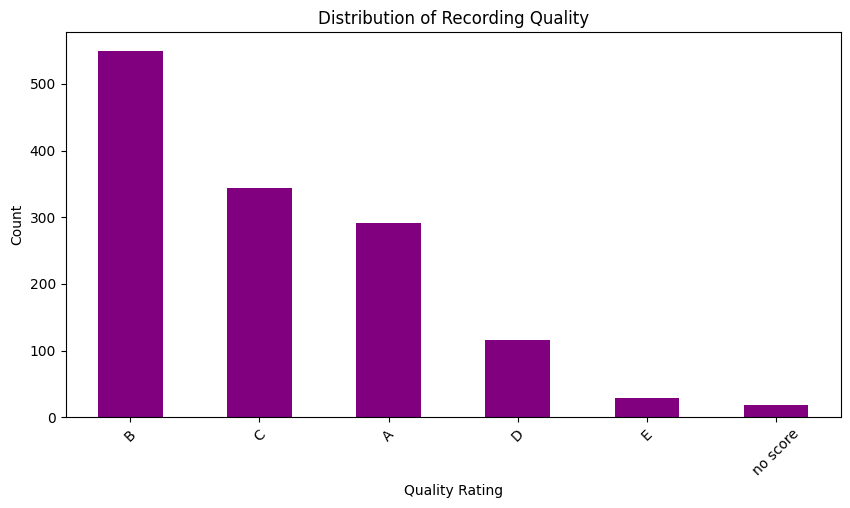

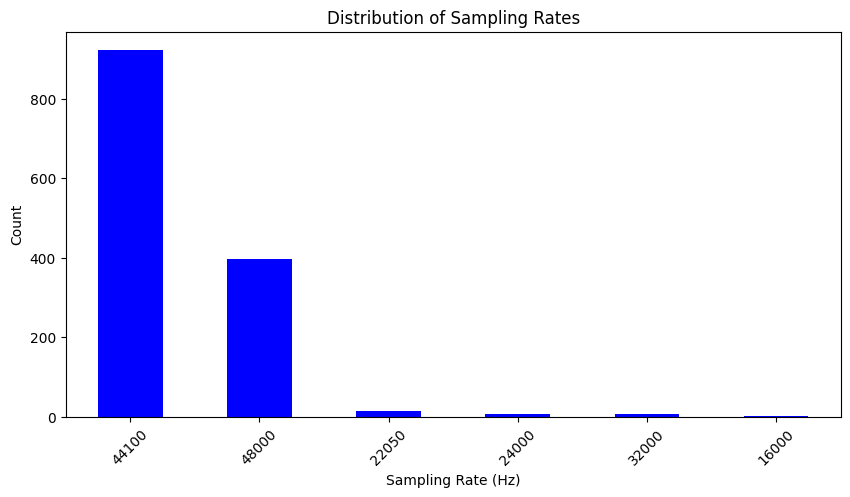

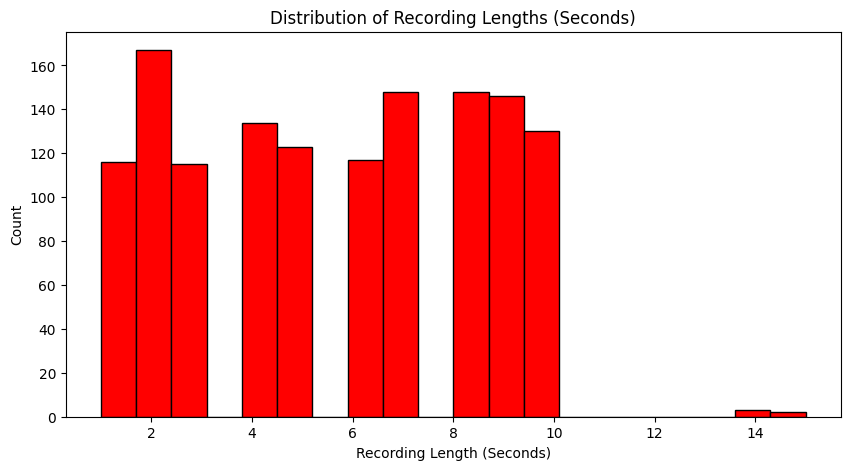

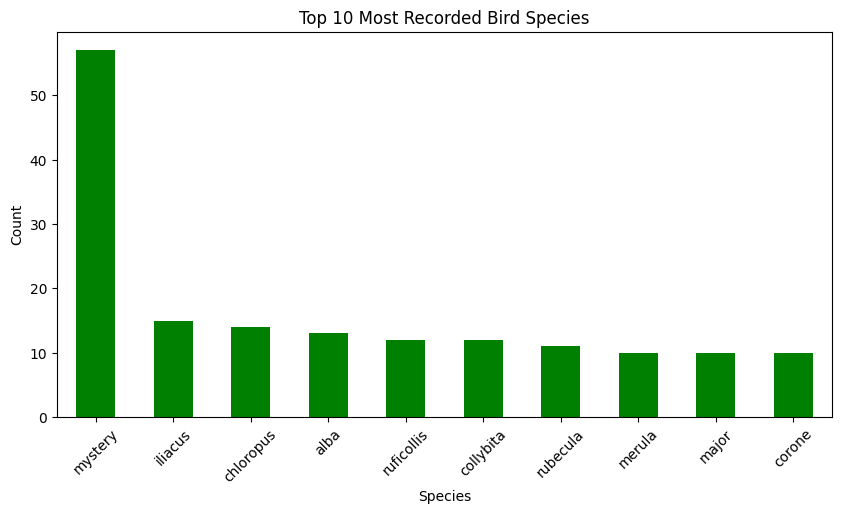

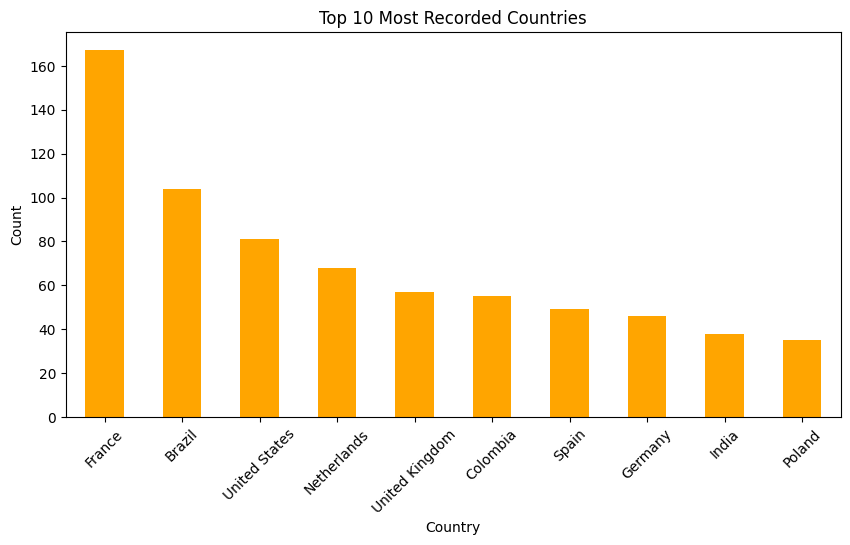

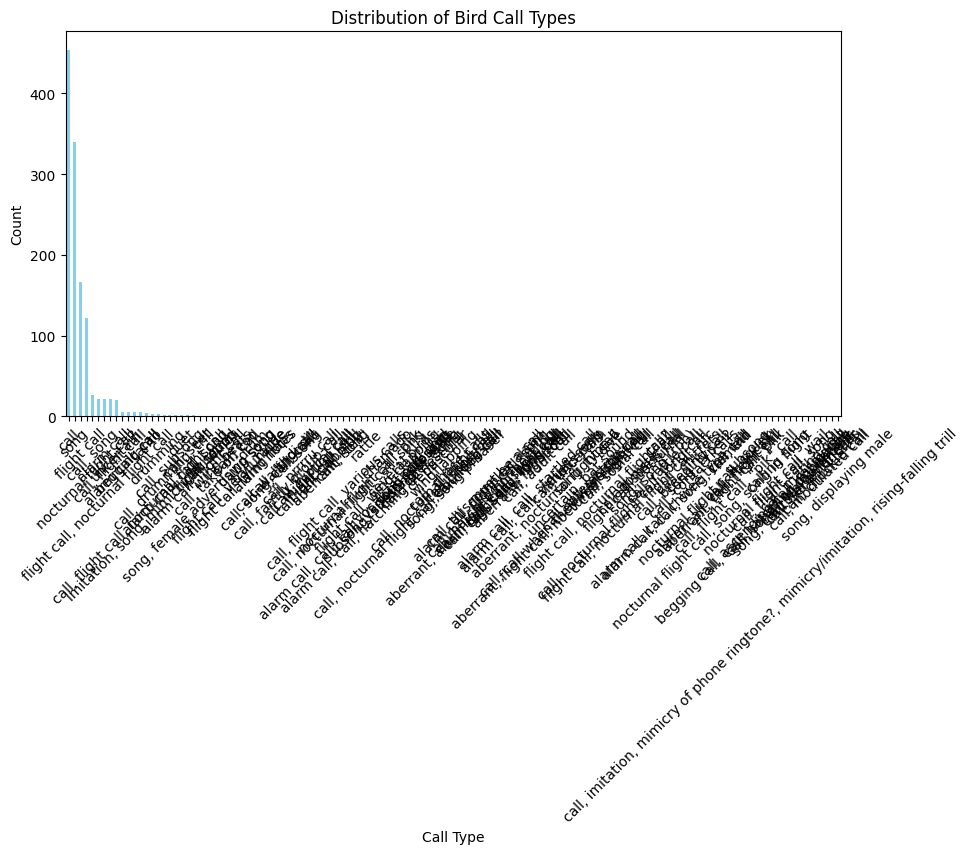

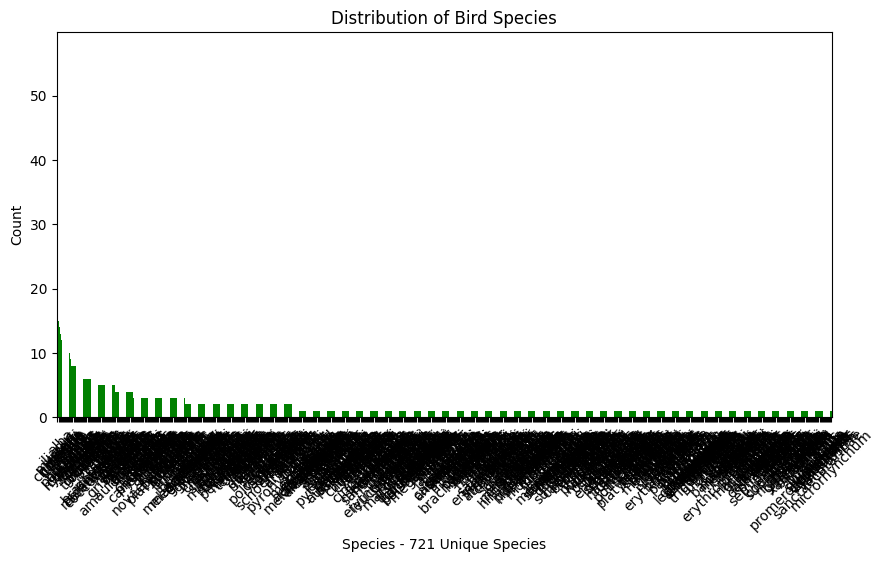

Dataset Summary: {'Total Records': 1349, 'Unique Bird Species': 721, 'Unique Locations': 1110, 'Unique Countries': 105, 'Most Common Call Type': 'call', 'Most Recorded Species': 'mystery', 'Most Recorded Country': 'France'}
Recording Length Statistics: count    1349.000000
mean        5.599703
std         2.925616
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        15.000000
Name: length_seconds, dtype: float64


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/users/vsharm44/projects/ssl-bioacoustics/configs/preprocessing_reproducibility_backup/birdsong_denoising/valid_cleaned.csv"
df = pd.read_csv(file_path, dtype=str)

# Convert length from MM:SS format to seconds
def convert_time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        try:
            minutes, seconds = map(int, time_str.split(':'))
            return minutes * 60 + seconds
        except ValueError:
            return np.nan
    return np.nan

df['length'] = df['length'].astype(str)
df['length_seconds'] = df['length'].apply(convert_time_to_seconds)

# General Dataset Summary
dataset_summary = {
    "Total Records": len(df),
    "Unique Bird Species": df['sp'].nunique(),
    "Unique Locations": df['loc'].nunique(),
    "Unique Countries": df['cnt'].nunique(),
    "Most Common Call Type": df['type'].mode()[0],
    "Most Recorded Species": df['sp'].mode()[0],
    "Most Recorded Country": df['cnt'].mode()[0],
}

# Recording Length Statistics
recording_length_stats = df['length_seconds'].describe()

# Plot 1: Recording Quality Distribution
plt.figure(figsize=(10, 5))
df['q'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribution of Recording Quality")
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Sampling Rate Distribution
plt.figure(figsize=(10, 5))
df['smp'].value_counts().plot(kind='bar', color='blue')
plt.title("Distribution of Sampling Rates")
plt.xlabel("Sampling Rate (Hz)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Recording Length Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['length_seconds'].dropna(), bins=20, color='red', edgecolor='black')
plt.title("Distribution of Recording Lengths (Seconds)")
plt.xlabel("Recording Length (Seconds)")
plt.ylabel("Count")
plt.show()

# Plot 4: Top 10 Most Recorded Bird Species
plt.figure(figsize=(10, 5))
df['sp'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Recorded Bird Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 5: Top 10 Most Recorded Countries
plt.figure(figsize=(10, 5))
df['cnt'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Recorded Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 6: Bird Call Type Distribution
plt.figure(figsize=(10, 5))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Bird Call Types")
plt.xlabel("Call Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 7: Bird Species Distribution
plt.figure(figsize=(10, 5))
df['sp'].value_counts().plot(kind='bar', color='green')
plt.title("Distribution of Bird Species")
plt.xlabel(f"Species - {dataset_summary['Unique Bird Species']} Unique Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Display results
print("Dataset Summary:", dataset_summary)
print("Recording Length Statistics:", recording_length_stats)
